In [1]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt

In [2]:
# Read Data
data=pd.read_excel(r"C:\VIKASH\Reserach Project\LVAD\Code\Particle tracking\PT QVAD28_AV3\Qvad28_Av3_PTT.xlsx")
data

,Injection_ID,Particle_ID,Flow_time,X,Y,Z,U,V,w,strain_rate_mag,Particle_time
0,0,0,1.0508,0.008980,-0.020212,0.021171,5.200442e-08,8.513471e-09,7.850252e-09,29.029380,1.0500
1,0,0,1.0800,0.008980,-0.020212,0.021171,4.959312e-08,9.941409e-09,8.168126e-09,27.102920,1.0793
2,0,0,1.1002,0.008980,-0.020212,0.021171,4.770308e-08,1.051481e-08,8.260233e-09,25.571880,1.0995
3,0,0,1.1400,0.008980,-0.020212,0.021171,4.376050e-08,1.083974e-08,8.076942e-09,22.692680,1.1393
4,0,0,1.1603,0.008980,-0.020212,0.021171,4.173278e-08,1.068081e-08,7.842884e-09,21.292690,1.1595
...,...,...,...,...,...,...,...,...,...,...,...
56297,9,8016,2.4503,0.009307,0.012431,0.121069,3.179525e-02,1.096698e+00,1.356087e+00,20.921010,2.4495
56298,9,8016,2.4908,0.030527,0.045703,0.130652,6.369841e-01,9.425359e-01,2.225871e-01,168.080300,2.4900
56299,9,8016,2.6707,0.047969,0.055344,-0.000209,2.657015e-02,-1.127702e-01,-8.852487e-01,120.886400,2.6700
56300,9,8017,1.9905,0.010414,-0.010225,0.026941,1.109182e-04,-6.876788e-05,1.232497e-05,2.225466,1.9898


In [18]:
my_list = data.Particle_ID
unique_values = list(set(my_list))
print(len(unique_values))

7200


[23 28 35 ...  4  1  1]
[   0    1    2 ... 8016 8017 8018]


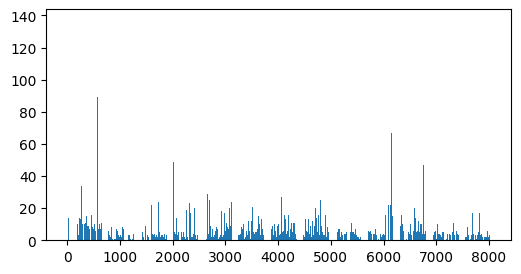

In [39]:
import numpy as np
uniques, counts = np.unique(data.Particle_ID, return_counts=True)
fig, ax = plt.subplots(figsize=(6, 3))
ax.bar(uniques,counts)
print(counts)
print(uniques)

In [31]:
df=[]
for j in range(max(data['Particle_ID'])):
    data_split_morethan30=data[data.Particle_ID==j]
    if (len(data_split_morethan30.X)>70):
        df.append(data_split_morethan30)
print(len(df))
df

24


[      Injection_ID  Particle_ID  Flow_time         X         Y         Z  \
 5510             2          574     1.1205  0.005283 -0.013434  0.025084   
 5511             2          574     1.2705  0.005283 -0.013434  0.025084   
 5512             2          574     1.3605  0.005283 -0.013434  0.025084   
 5513             2          574     1.4505  0.004599  0.011389  0.121460   
 5514             2          574     1.8802  0.010476  0.010252  0.125305   
 ...            ...          ...        ...       ...       ...       ...   
 5594             2          574     3.6600  0.050587  0.053859  0.021427   
 5595             2          574     3.6705  0.050632  0.051375  0.014375   
 5596             2          574     3.6803  0.050312  0.049339  0.007685   
 5597             2          574     3.6810  0.050274  0.049188  0.007160   
 5598             2          574     3.6907  0.049659  0.047291  0.000223   
 
                  U             V             w  strain_rate_mag  Particle

In [41]:
### Here I slected pparticle ID which is more than 90
options = [2267,4059,6540,6639] 
   
# selecting rows based on condition 
rslt_df = data[data['Particle_ID'].isin(options)] 
np.shape(rslt_df)

(445, 11)

In [42]:
x_sum=[]
y_sum=[]
z_sum=[]
t_sum=[]
for i in options:
 data_split=rslt_df[rslt_df.Particle_ID==i]
 x=np.array(data_split.X)
 y=np.array(data_split.Y)
 z=np.array(data_split.Z)
 t=np.array(data_split.strain_rate_mag)
 x_sum.append(x)
 y_sum.append(y)
 z_sum.append(z)
 t_sum.append(t)

print(len(x_sum[1]))
print(len(y_sum))
print(len(z_sum))
print(len(t_sum))
print(max(t_sum[3]))
print(max(t_sum[2]))
print(max(t_sum[1]))
print(max(t_sum[0]))

105
4
4
4
3146.362
300.5023
1642.441
932.4126


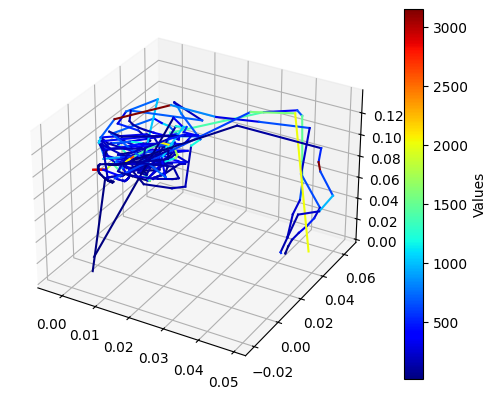

In [43]:
fig = plt.figure()
ax = plt.axes(projection = "3d")   # Creating plot    	

for o in range(4): 
   
    x_1=x_sum[o]
    y_1=y_sum[o]
    z_1=z_sum[o]
    v_1=t_sum[o]
   
    
    cmap = plt.cm.jet
    norm = plt.Normalize(min(v_1), max(v_1))
    colors = cmap(norm(v_1))
    for i in range(len(x_1) - 1):
     ax.plot(x_1[i:i+2], y_1[i:i+2], z_1[i:i+2], c=colors[i])
    

cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Values')
plt.show()


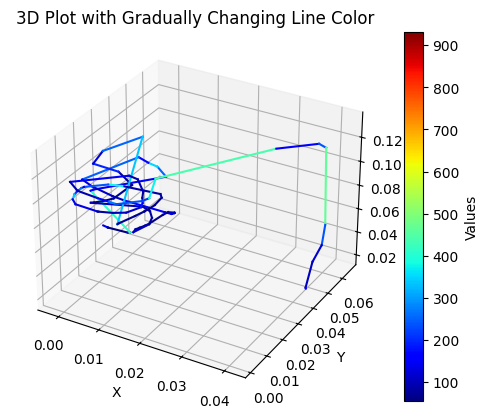

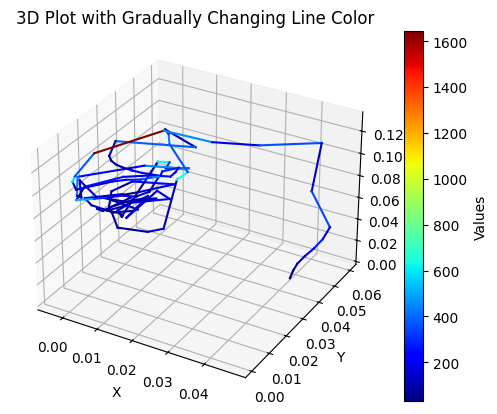

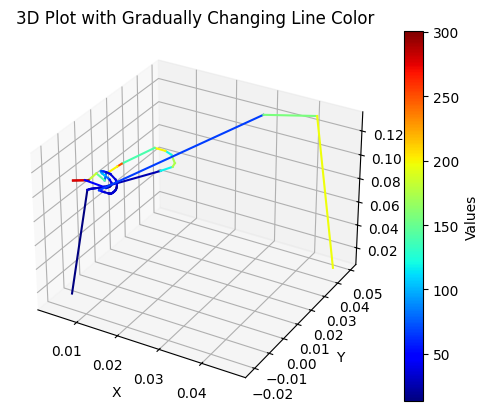

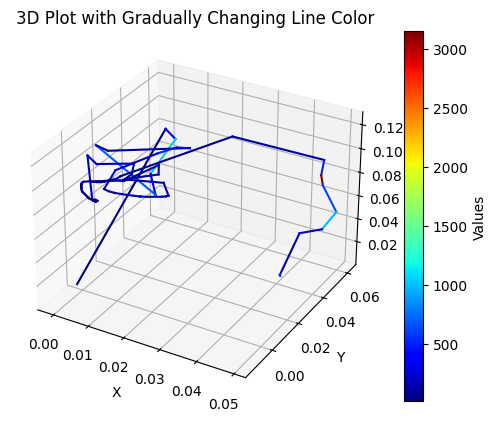

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
for st in range(4):
    # Define coordinates of multiple points in 3D space
    x_values = x_sum[st]
    y_values = y_sum[st]
    z_values = z_sum[st]

    # Define values associated with each point
    values = t_sum[st]# These values will determine the color of the line

    # Create a color map based on the values
    cmap = plt.cm.jet
    norm = plt.Normalize(min(values), max(values))
    colors = cmap(norm(values))
    
 

    # Plot the points in 3D space
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

   # Plot the line connecting the points with gradual color change
    for i in range(len(x_values) - 1):
     ax.plot(x_values[i:i+2], y_values[i:i+2], z_values[i:i+2], c=colors[i])


    # Add color bar to show the mapping of values to colors
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
    cbar.set_label('Values')

    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Plot with Gradually Changing Line Color')

    plt.show()


In [533]:
print(len(x_sum))
print(len(y_sum))
print(len(z_sum))
print(len(t_sum))


6639
6639
6639
6639


In [529]:
x_sum=[]
y_sum=[]
z_sum=[]
t_sum=[]
for i in range(max(data['Particle_ID'])):
    data_split=data[data.Particle_ID==i]
    x=np.array(data_split.X)
    y=np.array(data_split.Y)
    z=np.array(data_split.Z)
    t=np.array(data_split.strain_rate)
    x_sum.append(x)
    y_sum.append(y)
    z_sum.append(z)
    t_sum.append(t)

In [528]:
fig = plt.figure()
ax = plt.axes(projection = "3d")   # Creating plot    	

for o in range((max(rslt_df['Particle_ID']))): 
   
    x_1=x_sum[o]
    y_1=y_sum[o]
    z_1=z_sum[o]
    v_1=t_sum[o]
   
    scatt=ax.scatter3D(x_1, y_1,z_1,c=v_1)
    ax.plot(x_1, y_1, z_1, color='black')
   
fig.colorbar(scatt, ax = ax, shrink = 0.5, aspect = 5)
plt.show()



KeyboardInterrupt: 

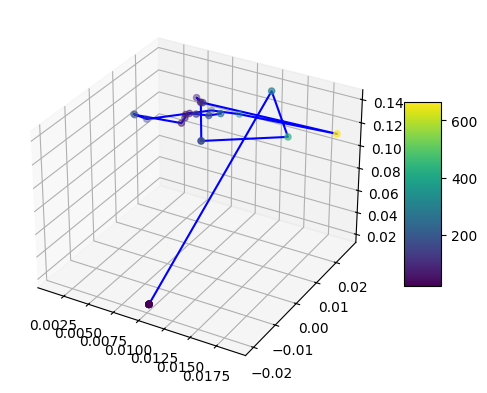

In [164]:
fig = plt.figure()
ax = plt.axes(projection = "3d")   # Creating plot 

x=[0.01024352, 0.01024352, 0.01024352, 0.01024352, 0.01024352,0.01024352, 0.01024352, 0.01272586, 0.01488066, 0.00840268,0.00841958, 0.00612381, 0.00608937, 0.00559995, 0.0074879 ,0.01894433, 0.00896065, 0.00627158, 0.0018348 , 0.00113672,0.00130267, 0.00592941, 0.00593462, 0.00589833, 0.00630335,0.0070438 , 0.00828402, 0.00918239]
y=[-0.02017004, -0.02017004, -0.02017004, -0.02017004, -0.02017004,-0.02017004, -0.02017004,  0.02395289,  0.02157643,  0.01147252, 0.01151217,  0.02182612,  0.02185561,  0.02225768,  0.01648101,0.02493323,  0.0269528 ,  0.02616079,  0.01604608,  0.01334991,0.01309276,  0.01374475,  0.01532395,  0.01586069,  0.01581003, 0.01550262,  0.015585  ,  0.01691096]
z=[0.02119511, 0.02119511, 0.02119511, 0.02119511, 0.02119511,0.02119511, 0.02119511, 0.1398413 , 0.1087377 , 0.1054877 ,0.1055981 , 0.1179555 , 0.1181164 , 0.1203278 , 0.1289972 ,0.1158681 , 0.1062993 , 0.1045903 , 0.1019574 , 0.1090107 , 0.1090771 , 0.11165   , 0.1138083 , 0.115885  , 0.1178827 , 0.1194748 , 0.121044  , 0.1227611 ]
t=[ 22.17449,  21.62776,  21.5873 ,  21.12345,  20.59052,  20.09604,
        20.05939, 302.1931 , 445.2188 , 172.3437 , 174.7211 ,  67.42304,
        69.58387,  63.17085, 120.249  , 665.4056 , 324.7988 , 193.7854 ,
       154.6558 , 196.0547 , 181.8295 ,  73.49301,  89.17325,  57.65916,
        75.18249, 132.1972 , 182.8401 , 269.0177 ]
scatt=ax.scatter3D(x, y,z,c=t)
ax.plot(x, y, z, color='blue')
fig.colorbar(scatt, ax = ax, shrink = 0.5, aspect = 5)

plt.show()

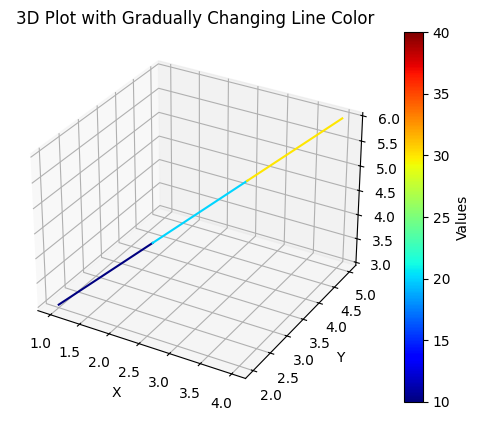

In [312]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define coordinates of multiple points in 3D space
x_values = [1, 2, 3, 4]
y_values = [2, 3, 4, 5]
z_values = [3, 4, 5, 6]

# Define values associated with each point
values = [10, 20, 30, 40]  # These values will determine the color of the line

# Create a color map based on the values
cmap = plt.cm.jet
norm = plt.Normalize(min(values), max(values))
colors = cmap(norm(values))

# Plot the points in 3D space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Plot the line connecting the points with gradual color change
for i in range(len(x_values) - 1):
    ax.plot(x_values[i:i+2], y_values[i:i+2], z_values[i:i+2], c=colors[i])

# Add color bar to show the mapping of values to colors
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Values')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot with Gradually Changing Line Color')

plt.show()


(10193, 3)


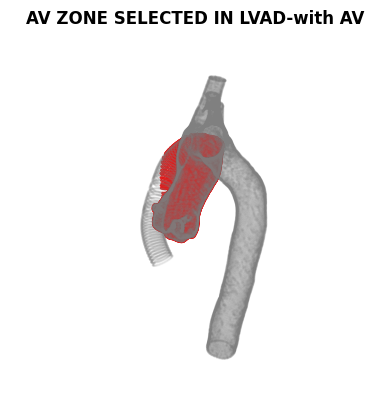

1.0000001e-05
0.03998
-0.05141
-0.0019
0.062170003
0.12499


In [1]:
# Find out time spet by partcles in AV Zone

# Define AV Zone

# STL for WITH AV
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
def loadstl(filename):
    cuboid = mesh.Mesh.from_file(filename)
    points = np.around(np.unique(cuboid.vectors.reshape([int(cuboid.vectors.size/3), 3]), axis=0), 2)
    X = points[:,0]
    Y = points[:,1]
    Z = points[:,2]
    return X, Y, Z
x=loadstl(r"C:\VIKASH\Reserach Project\LVAD\Code\Particle tracking\LVAD_NO_AV.stl")
# x=loadstl(r"C:\VIKASH\Reserach Project\LVAD\Code\Particle tracking\lvad_aorta model.stl")
df = pd.DataFrame(np.transpose(x), columns=['X', 'Y', 'Z'])

# Write the DataFrame to an Excel file
#df.to_excel("C:\VIKASH\Reserach Project\LVAD\Code\Particle tracking\STL_DATA_EXCEL.xlsx", index=False)

data= df.apply(lambda row: row * 0.001, axis=1)

# # WITh AV
# ymin=0
# ymax=0.03
# zmin = 0.075
# zmax = 0.125

# B1=data[(data["Y"]>ymin)& (data["Y"]<ymax)]
# data1=B1[(B1["Z"]>zmin)& (B1["Z"]<zmax)]
# print(np.shape(data1))


# NO AV
xmin=0
xmax=0.04
zmin = 0.05
zmax = 0.125

B1=data[(data["X"]>xmin)& (data["X"]<xmax)]
data1=B1[(B1["Z"]>zmin)& (B1["Z"]<zmax)]
print(np.shape(data1))


fig = plt.figure()

ax = plt.axes(projection = "3d")   # Creating plot  

ax.scatter3D(data['X'], data['Y'], data['Z'], color = "grey",alpha=0.1,s=1)
ax.scatter3D(data1['X'], data1['Y'], data1['Z'], color = "red",alpha=1,s=1)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.axis('off')
plt.grid("false")
plt.gca().set_aspect('equal')
plt.title("AV ZONE SELECTED IN LVAD-with AV",fontweight='bold')
plt.show()


print(np.min(data1['X']))
print(np.max(data1['X']))
print(np.min(data1['Y']))
print(np.max(data1['Y']))
print(np.min(data1['Z']))
print(np.max(data1['Z']))



In [60]:
# Keeping only last entry i.e. particle at 6 sec
data_particle=pd.read_excel(r"C:\VIKASH\Reserach Project\LVAD\Code\Particle tracking\PT Qvad28_NoAv\Qvad28_NoAv_PTT.xlsx")
df_filtered = data_particle.drop_duplicates(subset=['Particle_ID'], keep='last')
output_file = "C:\VIKASH\Reserach Project\LVAD\Code\Particle tracking\PT Qvad28_NoAv\Filter_data_last.xlsx"
df_filtered.to_excel(output_file, index=False)

In [14]:
# Keeping last entry which is less than 5 sec

data_particle1=pd.read_excel(r"C:\VIKASH\Reserach Project\LVAD\Code\Particle tracking\PT Qvad33_NoAv\Qvad33_NoAv_PTT.xlsx")
g=3
data_particle=data_particle1[data_particle1['Particle_time']<=g]

df_filtered = data_particle.drop_duplicates(subset=['Particle_ID'], keep='last')
print(len(df_filtered))

# output_file = r'C:\\VIKASH\\Reserach Project\\LVAD\\Code\\Particle tracking\\PT Qvad33_NoAv\\'+str(g)+ r's\\Filter_data_last.xlsx'


# df_filtered.to_excel(output_file, index=False)

import pandas as pd

# Create a sample DataFrame with x, y, z data
data = {
    'x': df_filtered["X"],
    'y': df_filtered["Y"],
    'z': df_filtered["Z"]
}
df = pd.DataFrame(data)

# # Define the cuboid region by its bounds with AV
# x_min, x_max = -0.0055700005,0.031990003
# y_min, y_max = 1.0000001e-05, 0.01999
# z_min, z_max = 0.07796, 0.12498001


# # Define the cuboid region by its bounds with NOAV
x_min, x_max = 1.0000001e-05,0.03998
y_min, y_max = -0.05141, -0.0019
z_min, z_max = 0.062170003, 0.12499


# Function to check if a point is within the cuboid
def is_point_in_cuboid(row, x_min, x_max, y_min, y_max, z_min, z_max):
    x, y, z = row['x'], row['y'], row['z']
    return (x_min <= x <= x_max) and (y_min <= y <= y_max) and (z_min <= z <= z_max)

# Apply the function to each row in the DataFrame
df['in_cuboid'] = df.apply(is_point_in_cuboid, axis=1, args=(x_min, x_max, y_min, y_max, z_min, z_max))

# Filter points that are within the cuboid
df_in_cuboid = df[df['in_cuboid']]

# Print the filtered points
print(len(df_in_cuboid))

Remaining=len(df_in_cuboid)/len(df_filtered)
print("At "+str(g) +"sec",Remaining)

# # Optionally, save the filtered points to a new Excel file
# output_file = r"C:\\VIKASH\\Reserach Project\\LVAD\\Code\\Particle tracking\\PT Qvad33_NoAv\\"+str(g)+"s\\points_in_cuboid.xlsx"
# df_in_cuboid.to_excel(output_file, index=False)
# print(f"Filtered points saved to {output_file}")


9068
1539
At 3sec 0.16971768857520952


In [39]:
data=pd.read_excel(r"C:\VIKASH\Reserach Project\LVAD\Code\Particle tracking\QVAD with Slopes.xls",sheet_name="Sheet3")
data

,QVAD's,2s,3s,4s,5s,6s
0,Qvad28_Av3,0.443885,0.176626,0.137500,0.132639,0.132361
1,Qvad28_Av5,0.550807,0.263326,0.127978,0.064972,0.039794
2,Qvad28_NoAv,0.161601,0.114269,0.105092,0.100553,0.096013
3,Qvad33_Av3,0.526354,0.118142,0.045477,0.040587,0.038924
4,Qvad33_Av5,0.561392,0.288575,0.122098,0.070999,0.045326
5,Qvad33_NoAv,0.179918,0.169718,0.131988,0.121403,0.113022


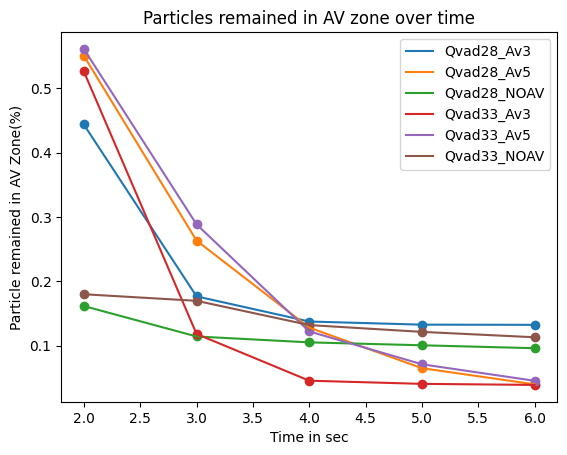

In [53]:
x=[2,3,4,5,6]
qvad28_av3=[0.443885,0.176626,0.137500,0.132639,0.132361]
qvad28_av5=[0.550807,	0.263326,	0.127978,	0.064972,	0.039794]
qvad28_noav=[	0.161601,	0.114269	,0.105092	,0.100553,	0.096013]
qvad33_av3=[0.526354,	0.118142,	0.045477,	0.040587	,0.038924]
qvad33_av5=[0.561392	,0.288575	,0.122098	,0.070999	,0.045326]
qvad33_noav=[	0.179918	,0.169718	,0.131988,	0.121403,	0.113022]
plt.plot(x,qvad28_av3,label='Qvad28_Av3')
plt.plot(x,qvad28_av5,label='Qvad28_Av5')
plt.plot(x,qvad28_noav,label='Qvad28_NOAV')
plt.plot(x,qvad33_av3,label='Qvad33_Av3')
plt.plot(x,qvad33_av5,label='Qvad33_Av5')
plt.plot(x,qvad33_noav,label='Qvad33_NOAV')

plt.scatter(x,qvad28_av3)
plt.scatter(x,qvad28_av5)
plt.scatter(x,qvad28_noav)
plt.scatter(x,qvad33_av3)
plt.scatter(x,qvad33_av5)
plt.scatter(x,qvad33_noav)

plt.title("Particles remained in AV zone over time")
plt.legend(loc='upper right')
plt.xlabel("Time in sec")
plt.ylabel("Particle remained in AV Zone(%)")
plt.show()

In [6]:
1000//=10

SyntaxError: 'literal' is an illegal expression for augmented assignment (3898480713.py, line 1)